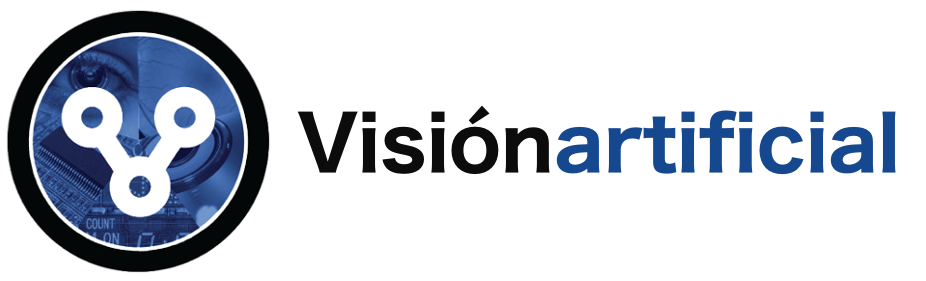

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />


# <font style="color:rgb(50,120,229)">Rastrexar varios obxectos</font>

# <font style="color:rgb(50,120,229)">Seguimento de varios obxectos</font>

Ata agora discutimos como rastrexar obxectos individuais nunha secuencia de fotogramas. Pode haber aplicacións nas que sexa necesario rastrexar varios obxectos ao mesmo tempo. OpenCV ten unha clase **Multiobject Tracker** que ten unha implementación moi básica dun rastreador multiobxecto. Procesa os obxectos seguidos de forma independente sen ningunha optimización entre os obxectos seguidos.

Vexamos o código para descubrir como podemos usar a API de seguimento multiobxecto de OpenCV.

## <font style="color:rgb(50,120,229)">Código - MultiTracker</font>

In [1]:
import cv2
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [3]:
trackerTypes = ['BOOSTING', 'MIL', 'KCF','TLD', 'MEDIANFLOW', 'GOTURN', 'MOSSE', 'CSRT']

<font style="color:rgb(200,0,0)">**NOTA:**</font> GOTURN, sendo un rastreador baseado na CNN, usa un modelo cafe para o seguimento. O modelo Caffe e o ficheiro prototxt deben estar no directorio onde se esté executanto este código.


In [4]:
def createTrackerByName(trackerType):
  # Crea un rastreador baseado no nome do rastreador
  if trackerType == trackerTypes[0]:
    tracker = cv2.TrackerBoosting_create()
  elif trackerType == trackerTypes[1]:
    tracker = cv2.legacy.TrackerMIL_create()
  elif trackerType == trackerTypes[2]:
    tracker = cv2.legacy.TrackerKCF_create()
  elif trackerType == trackerTypes[3]:
    tracker = cv2.legacy.TrackerTLD_create()
  elif trackerType == trackerTypes[4]:
    tracker = cv2.legacy.TrackerMedianFlow_create()
  elif trackerType == trackerTypes[5]:
    tracker = cv2.legacy.TrackerGOTURN_create()
  elif trackerType == trackerTypes[6]:
    tracker = cv2.legacy.TrackerMOSSE_create()
  elif trackerType == trackerTypes[7]:
    tracker = cv2.legacy.TrackerCSRT_create()
  else:
    tracker = None
    print('nome do tracker incorrecto')
    print('Os tracker disponhibles son :')
    for t in trackerTypes:
        print(t)

  return tracker

Establece o algoritmo de seguimento e o path ao ficheiro de vídeo


In [5]:
print("o tracker por defecto e CSRT \n"
    "os tracker disponhibles son:\n")
for t in trackerTypes:
    print(t)

trackerType = "CSRT"

# cargamos o video
videoPath = "../data/cycle.mp4"

o tracker por defecto e CSRT 
os tracker disponhibles son:

BOOSTING
MIL
KCF
TLD
MEDIANFLOW
GOTURN
MOSSE
CSRT


Abre o ficheiro de vídeo e le o primeiro fotograma

In [6]:
# Crea un obxecto de captura de vídeo para ler vídeos
cap = cv2.VideoCapture(videoPath)

# Ler o primeiro cadro
success, frame = cap.read()

# saír se non pode ler o ficheiro de vídeo
if not success:
    print('Fallo ao ler o video')

Debuxa unha caixa arredor dun obxecto. Podes volver debuxar a caixa se a selección anterior non foi correcta. O valor do cadro delimitador só se almacenará no código cando premas ENTER. Despois de premer ENTER, pulsa calquera tecla que non sexa **q** para seleccionar o seguinte cadro delimitador. Podes seguir seleccionando cantos cadros delimitadores queiras. Para saír do paso de selección de obxectos, preme ESCAPE. O comportamento de selectROI na API de Python é diferente ao da API de C++. Só podes seleccionar 1 caixa mentres chamas a selectROI, polo que chamamos a selectROI varias veces para seleccionar varios obxectos.

**Lembra a secuencia: Seleccione a caixa -> Preme Intro -> Preme outra tecla -> Seleccione Caixa -> Prema Intro -> Prema ESC**

In [7]:
## Selecionamos caixas
colors = []
for i in range(3):
    # cores aleatorios
    colors.append((randint(64, 255), randint(64, 255),
                randint(64, 255)))
#seleccionamos as caixas delimitadoreas
bboxes = [(471, 250, 66, 159), (349, 232, 69, 102)]

print('Selecciona as caixas delimitadoras {}'.format(bboxes))

Selecciona as caixas delimitadoras [(471, 250, 66, 159), (349, 232, 69, 102)]


In [8]:
## Inicializa MultiTracker
# Hai dúas formas de inicializar o multitracker
# 1. rastreador = cv2.MultiTracker("CSRT")
# Todos os rastreadores engadidos a este multitracker
# usará o algoritmo CSRT por defecto
# 2. rastreador = cv2.MultiTracker()
# Non se especifica ningún algoritmo predeterminado

# Inicialice MultiTracker cun algoritmo de seguimento
# Especifique o tipo de rastreador

# Crear obxecto MultiTracker
multiTracker = cv2.legacy.MultiTracker_create()

# inicializamos o multitracker
for bbox in bboxes:
    multiTracker.add(createTrackerByName(trackerType), frame, bbox)

Agora procesamos os fotogramas do vídeo e saimos despois de ler o último fotograma. E despois, actualiza o rastreador cun novo frame e debuxa os cadros delimitadores devoltos polo tracker.

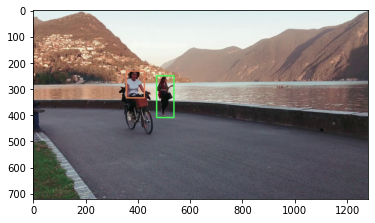

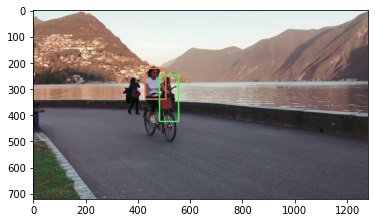

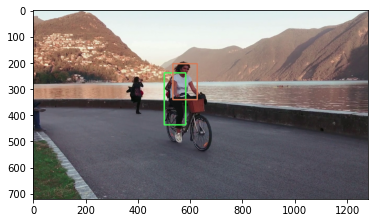

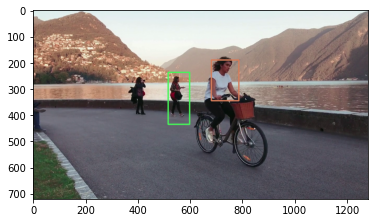

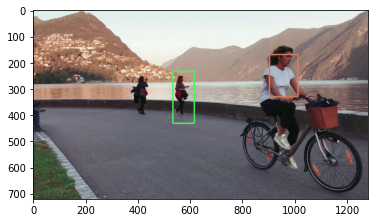

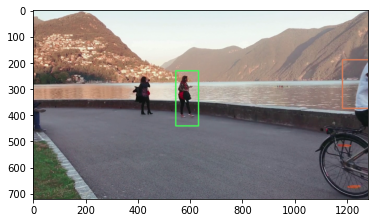

In [9]:
#Mostraremos só 5 cadros
count = 0

# procesamos o video e seguimos aos obxectos
while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    # obter a localización actualizada dos obxectos en cadros posteriores
    success, boxes = multiTracker.update(frame)

    # debuxa obxectos rastrexados
    for i, newbox in enumerate(boxes):
        p1 = (int(newbox[0]), int(newbox[1]))
        p2 = (int(newbox[0] + newbox[2]), int(newbox[1] + newbox[3]))
        cv2.rectangle(frame, p1, p2, colors[i], 4, cv2.LINE_AA)

    # visualizamos
    if count % 10 == 0:
        plt.imshow(frame[:,:,::-1])
        plt.show()
    
    count += 1
    
    if count > 50:
        break

In [10]:
cap.release()